In [104]:
import pandas as pd
import numpy as np

In [105]:
data=pd.read_csv("/content/drive/MyDrive/Salaries.csv")

In [106]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [107]:
# Feature Engineering

In [108]:
def feature_engineering(data):
  ##convert the sex column into 0 and 1, if male the 1 else 0
  data['sex']=np.where(data['sex']=="Male",1,0)

  data['rank']=np.where(data['rank']=="Prof",1,0)

  data['discipline']=np.where(data['discipline']=="B",1,0)
  return data



In [109]:
data = feature_engineering(data)

In [110]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,1,139750
1,1,1,20,16,1,173200
2,0,1,4,3,1,79750
3,1,1,45,39,1,115000
4,1,1,40,41,1,141500


In [111]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [112]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.670025,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.470797,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,1.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,1.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,1.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [113]:
data.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [114]:
data.isnull().any()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
salary           False
dtype: bool

In [115]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [116]:
import matplotlib.pyplot as plt

In [117]:
import seaborn as sns

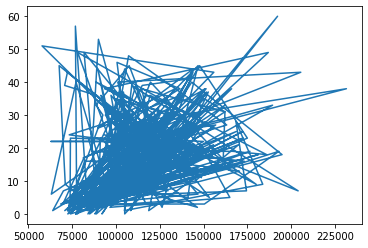

In [118]:
plt.plot(data['salary'],data['yrs.service'])

In [119]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,1,139750
1,1,1,20,16,1,173200
2,0,1,4,3,1,79750
3,1,1,45,39,1,115000
4,1,1,40,41,1,141500
...,...,...,...,...,...,...
392,1,0,33,30,1,103106
393,1,0,31,19,1,150564
394,1,0,42,25,1,101738
395,1,0,25,15,1,95329


In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
sc=StandardScaler()

In [122]:
x=data[['rank','sex','discipline','yrs.since.phd','yrs.service']]

In [123]:
y=data['salary']

In [124]:
y.value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [125]:
x=sc.fit_transform(x)

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [128]:
print("Train data shape:{}".format(xtrain.shape))
print("Test data shape:{}".format(xtest.shape))

Train data shape:(317, 5)
Test data shape:(80, 5)


In [129]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()

In [130]:
L.fit(xtrain,ytrain)

LogisticRegression()

In [131]:
y_pred=L.predict(xtest)

In [132]:
result={
    'Actual':ytest,
    'Predicted':y_pred
}

In [133]:
y_pred

array([ 88600,  78162,  92000, 109646,  92000,  92000, 105000,  92000,
       126320, 105000, 101000, 101000,  81800, 101000,  88600, 105000,
       133700, 101000,  57800,  92000, 101000, 105000, 101000, 186960,
       101000,  92000,  72500, 101000, 101000, 101000, 105000,  88600,
       105000, 105000, 101000, 101000,  74000,  92000,  92000, 133700,
       133700, 186960, 101000, 105000, 140096,  72500,  72500, 101000,
        88600, 105260, 101000, 105260,  92000,  88600, 101000, 105000,
        88600,  92000,  74000, 105000,  92000,  92000, 105000,  88600,
       186960, 117150,  72500,  88600,  74000,  72500,  77000, 105260,
       146500, 101000,  92000,  92000,  92000, 105000, 133700,  88600])

In [134]:
pd.DataFrame(result)

,Actual,Predicted
109,131205,88600
131,76840,78162
354,83600,92000
245,90450,109646
78,86100,92000
...,...,...
27,82379,92000
328,99247,92000
288,150500,105000
100,133217,133700


In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [136]:
print("Accuracy Score: {}".format(accuracy_score(ytest,y_pred)*100),"\n")
print("Confusion Matrix:\n {}".format(confusion_matrix(ytest,y_pred)),"\n")
print("Classification Report: {}".format(classification_report(ytest,y_pred)),"\n")

Accuracy Score: 1.25 

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]] 

Classification Report:               precision    recall  f1-score   support

       57800       0.00      0.00      0.00         0
       63900       0.00      0.00      0.00         1
       68404       0.00      0.00      0.00         1
       69200       0.00      0.00      0.00         1
       71065       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         0
       73500       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         0
       74692       0.00      0.00      0.00         1
       74830       0.00      0.00      0.00         1
       74856       0.00      0.00      0.00         1
       75243       0.00      0.00      0.00         1
       76840       0.00      0.00      0.00         1
       77000       0.00      0.00      0.00         0
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1